In [1]:
import pandas as pd
url = '/content/sample_data/mnist_train_small.csv'
url_test = '/content/sample_data/mnist_test.csv'

df = pd.read_csv(url, header=None)
test_df = pd.read_csv(url_test, header=None)

df.head()
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
df.shape

(2000, 785)

In [3]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

y_test = test_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]

In [4]:
X.shape

(2000, 784)

In [5]:
X.shape[1]**.5

28.0

(784,)


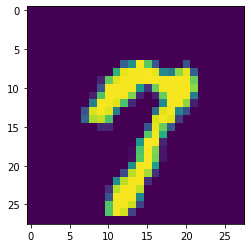

In [6]:
import numpy as np
import matplotlib.pyplot as plt

random_index = np.random.randint(0, X.shape[0])

random_row = X.iloc[random_index, :]

np_random_row = np.array(random_row)


print(np_random_row.shape)

random_im = np_random_row.reshape(28,28)

plt.imshow(random_im)
plt.show()

In [7]:
y.value_counts()


1    222
9    217
7    216
2    215
8    197
6    197
4    193
3    186
5    180
0    177
Name: 0, dtype: int64

In [8]:
# 1-hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X/255
X_test = X_test/255

In [9]:
#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm

num_cols = X.shape[1]

model = Sequential()

model.add(Dense(70, input_shape=(num_cols,), activation='relu'))

model.add(Dropout(.2))

model.add(Dense(70, input_shape=(num_cols,), activation='relu'))

model.add(Dropout(.2))

model.add(Dense(50, input_shape=(num_cols,), activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(.2))


model.add(Dense(10, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                54950     
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dropout_1 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Early stop
early_stopping_monitor = EarlyStopping(patience=20)

model.fit(X_train, y_train, epochs=2000, validation_split=0.1, callbacks=[early_stopping_monitor])


model.evaluate(X_test, y_test)

Epoch 1/2000
57/57 [==============================] - 15s 14ms/step - loss: 2.1652 - accuracy: 0.2070 - val_loss: 1.2513 - val_accuracy: 0.7200
Epoch 2/2000
57/57 [==============================] - 0s 3ms/step - loss: 1.2159 - accuracy: 0.6087 - val_loss: 0.6060 - val_accuracy: 0.8300
Epoch 3/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.7585 - accuracy: 0.7480 - val_loss: 0.4035 - val_accuracy: 0.8900
Epoch 4/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.8106 - val_loss: 0.3487 - val_accuracy: 0.8850
Epoch 5/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.8580 - val_loss: 0.2974 - val_accuracy: 0.9050
Epoch 6/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8730 - val_loss: 0.3216 - val_accuracy: 0.9000
Epoch 7/2000
57/57 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8851 - val_loss: 0.2691 - val_accuracy: 0.9200
Epoc

[0.4760875999927521, 0.8945000171661377]

In [11]:
X.shape

(2000, 784)